In [1]:
import pandas as pd
import string

In [2]:
data = pd.read_csv('train.csv')

In [3]:
import re
def preprocess(text):
    #remove urls
    text = re.sub(r'https?://\S+|www.\S+','',text)
    
    #remove tags
    text = re.sub(r'<.*?>', '',text)
    
    #remove all the characters except letters
    
    text = re.sub(r'[^A-Za-z]',' ',text)
    
    translator = str.maketrans("","",string.punctuation)
    
    text = text.translate(translator)
    return text

In [4]:
data['Message'] = data['Message'].map(preprocess)

In [5]:
data.columns

Index(['Category', 'Message'], dtype='object')

In [6]:
ham = data[data['Category'] =='ham'] ['Message'].str.cat(sep=' ')

In [7]:
spam = data[data['Category'] =='spam'] ['Message'].str.cat(sep=' ')

In [9]:
#vectorization

In [13]:
import numpy as np

In [16]:
from sklearn.feature_extraction.text import CountVectorizer

In [17]:
c = CountVectorizer()

In [19]:
X = c.fit_transform(data['Message']).toarray()

In [25]:
from sklearn.preprocessing import LabelEncoder
y = LabelEncoder().fit_transform(data['Category'])

In [24]:
from sklearn.model_selection import train_test_split

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=9, shuffle = True)

In [29]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

In [37]:
model = Sequential(
[
    Dense(64,activation='relu'),
    Dense(64,activation='relu'),
    Dense(1,activation='sigmoid')
    
]
)

In [38]:
model.compile(optimizer='rmsprop',loss='binary_crossentropy', metrics='accuracy')

In [39]:
model.fit(X_train,y_train, epochs=10, validation_data=(X_test,y_test))

Epoch 1/10
122/122 [==============================] - 3s 14ms/step - loss: 0.2198 - accuracy: 0.9405 - val_loss: 0.0876 - val_accuracy: 0.9785
Epoch 2/10
122/122 [==============================] - 1s 12ms/step - loss: 0.0486 - accuracy: 0.9874 - val_loss: 0.0904 - val_accuracy: 0.9815
Epoch 3/10
122/122 [==============================] - 1s 12ms/step - loss: 0.0296 - accuracy: 0.9915 - val_loss: 0.0924 - val_accuracy: 0.9785
Epoch 4/10
122/122 [==============================] - 1s 11ms/step - loss: 0.0209 - accuracy: 0.9931 - val_loss: 0.1012 - val_accuracy: 0.9785
Epoch 5/10
122/122 [==============================] - 1s 12ms/step - loss: 0.0136 - accuracy: 0.9944 - val_loss: 0.1255 - val_accuracy: 0.9821
Epoch 6/10
122/122 [==============================] - 1s 12ms/step - loss: 0.0101 - accuracy: 0.9959 - val_loss: 0.1391 - val_accuracy: 0.9785
Epoch 7/10
122/122 [==============================] - 1s 11ms/step - loss: 0.0076 - accuracy: 0.9972 - val_loss: 0.1431 - val_accuracy: 0.9773

In [41]:
preds = model.predict(X_test)

In [43]:
from tensorflow.math import confusion_matrix

In [44]:
confusion_matrix(y_test, preds)

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[1438,    0],
       [  68,  166]])>

In [53]:
from sklearn.metrics import roc_curve,plot_roc_curve

In [54]:
fpr , tpr , thresholds = roc_curve ( y_test , preds)

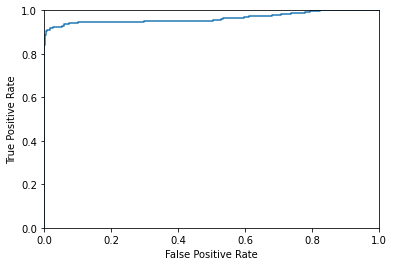

In [56]:
%matplotlib inline
import matplotlib.pyplot as plt
def plot_roc_curve(fpr,tpr): 
  plt.plot(fpr,tpr) 
  plt.axis([0,1,0,1]) 
  plt.xlabel('False Positive Rate') 
  plt.ylabel('True Positive Rate') 
  plt.show()    
  
plot_roc_curve (fpr,tpr) 